In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
colors=['#011f4b','#03396c','#005b96','#6497b1','#b3cde0']
sns.set_palette(sns.color_palette(colors))

# Reading and Understanding Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Temp_hack/data/Train/train_data.csv")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   object 
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   object 
 5   Transmission       3499 non-null   object 
 6   Owner_Type         3499 non-null   object 
 7   Mileage            3499 non-null   object 
 8   Engine             3477 non-null   object 
 9   Power              3477 non-null   object 
 10  Seats              3474 non-null   float64
 11  New_Price          481 non-null    object 
 12  Price              3499 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 355.5+ KB


In [ ]:
df.drop('New_Price', axis=1, inplace=True)

### Filling Null Values

In [ ]:
df['Engine'].fillna('0 CC', inplace=True)
df['Power'].fillna('0 bhp', inplace=True)
df['Seats'].fillna(df['Seats'].mean(), inplace=True)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


### Extracting Numerical Values From String Value

In [ ]:
df['Mileage'] = df['Mileage'].str.extract('(\d+)').astype(int)
df['Engine'] = df['Engine'].str.extract('(\d+)').astype(int)
df['Power'] = df['Power'].str.extract('(\d+)').astype(float)
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26,998,58.0,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19,1582,126.0,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18,1199,88.0,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20,1248,88.0,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15,1968,140.0,5.0,17.74


### Encoding different variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Location']=encoder.fit_transform(df['Location'])
df['Fuel_Type']=encoder.fit_transform(df['Fuel_Type'])
df['Transmission']=encoder.fit_transform(df['Transmission'])
df['Owner_Type']=encoder.fit_transform(df['Owner_Type'])
df['Price']=encoder.fit_transform(df['Price'])
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,2010,72000,0,1,0,26,998,58.0,5.0,45
1,Hyundai Creta 1.6 CRDi SX Option,10,2015,41000,1,1,0,19,1582,126.0,5.0,628
2,Honda Jazz V,2,2011,46000,3,1,0,18,1199,88.0,5.0,219
3,Maruti Ertiga VDI,2,2012,87000,1,1,0,20,1248,88.0,7.0,321
4,Audi A4 New 2.0 TDI Multitronic,3,2013,40670,1,0,2,15,1968,140.0,5.0,719


#### Filling null values of Engine and Power

In [ ]:
mean_engine = int(df['Engine'].mean())
mean_power = int(df['Power'].mean())

df['Engine'].replace(0, mean_engine, inplace=True)
df['Power'].replace(0, mean_power, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   int64  
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   int64  
 5   Transmission       3499 non-null   int64  
 6   Owner_Type         3499 non-null   int64  
 7   Mileage            3499 non-null   int64  
 8   Engine             3499 non-null   int64  
 9   Power              3434 non-null   float64
 10  Seats              3499 non-null   float64
 11  Price              3499 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 328.2+ KB


In [ ]:
df['Power'].fillna(df['Power'].mean(), inplace=True)
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               3499 non-null   object 
 1   Location           3499 non-null   int64  
 2   Year               3499 non-null   int64  
 3   Kilometers_Driven  3499 non-null   int64  
 4   Fuel_Type          3499 non-null   int64  
 5   Transmission       3499 non-null   int64  
 6   Owner_Type         3499 non-null   int64  
 7   Mileage            3499 non-null   int64  
 8   Engine             3499 non-null   int64  
 9   Power              3499 non-null   float64
 10  Seats              3499 non-null   float64
 11  Price              3499 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 328.2+ KB


# Data Engineering (Replacing Year with the Car Age)

In [ ]:
df.rename(columns = {'Year':'Car_age'}, inplace = True)
df.columns

Index(['Name', 'Location', 'Car_age', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [ ]:
df['Car_age'] = 2023 - df['Car_age']
df.head()

,Name,Location,Car_age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,9,13,72000,0,1,0,26,998,58.0,5.0,45
1,Hyundai Creta 1.6 CRDi SX Option,10,8,41000,1,1,0,19,1582,126.0,5.0,628
2,Honda Jazz V,2,12,46000,3,1,0,18,1199,88.0,5.0,219
3,Maruti Ertiga VDI,2,11,87000,1,1,0,20,1248,88.0,7.0,321
4,Audi A4 New 2.0 TDI Multitronic,3,10,40670,1,0,2,15,1968,140.0,5.0,719


### Using Standard Scaler to scale the data

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df[['Location','Car_age','Kilometers_Driven','Mileage','Engine','Power','Seats', 'Price']] = sc.fit_transform(df[['Location','Car_age','Kilometers_Driven','Mileage','Engine','Power','Seats', 'Price']])

In [ ]:
df.head()

,Name,Location,Car_age,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,1.132100,1.046761,0.105165,0,1,0,1.814552,-1.061995,-1.051354,-0.354464,-1.202406
1,Hyundai Creta 1.6 CRDi SX Option,1.470405,-0.504538,-0.161931,1,1,0,0.291408,-0.068338,0.243818,-0.354464,0.972743
2,Honda Jazz V,-1.236037,0.736501,-0.118851,3,1,0,0.073816,-0.720000,-0.479954,-0.354464,-0.553219
3,Maruti Ertiga VDI,-1.236037,0.426241,0.234406,1,1,0,0.509000,-0.636628,-0.479954,2.079151,-0.172662
4,Audi A4 New 2.0 TDI Multitronic,-0.897732,0.115982,-0.164775,1,0,2,-0.578960,0.588428,0.510471,-0.354464,1.312260


### Creating Target and Variable from Data

In [ ]:
X=df.drop(['Price', 'Name'],axis=1)
y=df['Price'].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           3499 non-null   float64
 1   Car_age            3499 non-null   float64
 2   Kilometers_Driven  3499 non-null   float64
 3   Fuel_Type          3499 non-null   int64  
 4   Transmission       3499 non-null   int64  
 5   Owner_Type         3499 non-null   int64  
 6   Mileage            3499 non-null   float64
 7   Engine             3499 non-null   float64
 8   Power              3499 non-null   float64
 9   Seats              3499 non-null   float64
dtypes: float64(7), int64(3)
memory usage: 273.5 KB


In [ ]:
X['Fuel_Type']=X['Fuel_Type'].astype(float)
X['Transmission']=X['Transmission'].astype(float)
X['Owner_Type']=X['Owner_Type'].astype(float)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           3499 non-null   float64
 1   Car_age            3499 non-null   float64
 2   Kilometers_Driven  3499 non-null   float64
 3   Fuel_Type          3499 non-null   float64
 4   Transmission       3499 non-null   float64
 5   Owner_Type         3499 non-null   float64
 6   Mileage            3499 non-null   float64
 7   Engine             3499 non-null   float64
 8   Power              3499 non-null   float64
 9   Seats              3499 non-null   float64
dtypes: float64(10)
memory usage: 273.5 KB


In [ ]:
for i in X.columns:
    X[i]=X[i].astype(int)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Location           3499 non-null   int64
 1   Car_age            3499 non-null   int64
 2   Kilometers_Driven  3499 non-null   int64
 3   Fuel_Type          3499 non-null   int64
 4   Transmission       3499 non-null   int64
 5   Owner_Type         3499 non-null   int64
 6   Mileage            3499 non-null   int64
 7   Engine             3499 non-null   int64
 8   Power              3499 non-null   int64
 9   Seats              3499 non-null   int64
dtypes: int64(10)
memory usage: 273.5 KB


### OverSampling the Data

In [ ]:
from imblearn.over_sampling import RandomOverSampler
X_over,y_over=RandomOverSampler().fit_resample(X,y)

### Creating Training and Testing Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,stratify=y_over)
print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}')

Train shape : (6762, 10)
Test shape: (2254, 10)


# Trying Different Model

### 1. KNeighbors

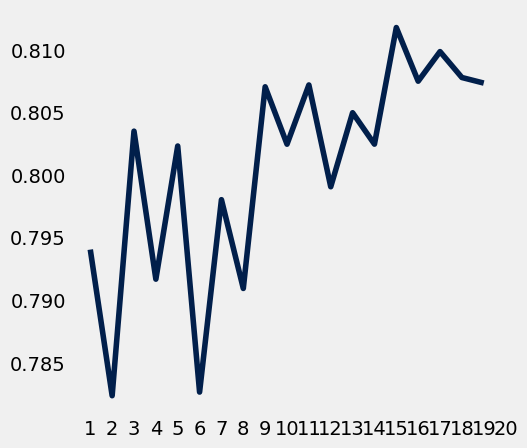

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,X_train,y_train,cv=5)
    knn_scores.append(scores.mean())

x_ticks = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
x_labels = x_ticks

plt.figure(figsize=(5,5))
plt.plot([k for k in range(1,20)],knn_scores)
plt.xticks(ticks=x_ticks, labels=x_labels)
plt.grid()

              precision    recall  f1-score   support

          -1       0.74      0.92      0.82       564
           0       0.80      0.57      0.67       563
           1       0.80      0.82      0.81       564
           2       0.89      0.89      0.89       563

    accuracy                           0.80      2254
   macro avg       0.81      0.80      0.80      2254
weighted avg       0.81      0.80      0.80      2254



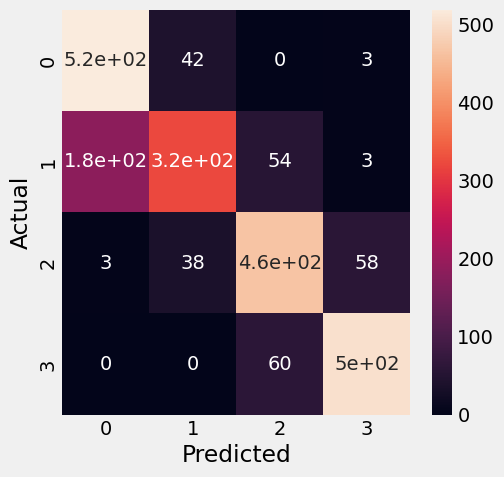

In [ ]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
from sklearn.metrics import confusion_matrix
confusion_knn=confusion_matrix(y_test,knn.predict(X_test))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_knn,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
from sklearn.metrics import classification_report
print(classification_report(y_test,knn.predict(X_test)))


##### 78% Accuracy

### 2. SVC

              precision    recall  f1-score   support

          -1       0.88      0.85      0.86       564
           0       0.81      0.80      0.81       563
           1       0.83      0.86      0.84       564
           2       0.90      0.90      0.90       563

    accuracy                           0.85      2254
   macro avg       0.85      0.85      0.85      2254
weighted avg       0.85      0.85      0.85      2254


Best Parameters of SVC model is : {'gamma': 10, 'C': 10}



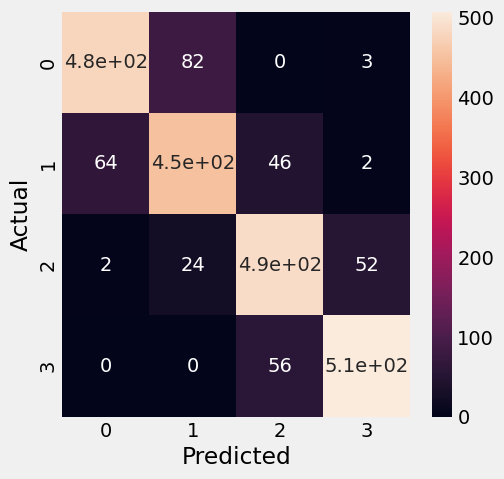

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'gamma':[0.001,0.01,0.1,1,10,100]}
rcv=RandomizedSearchCV(SVC(),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_svc=rcv.predict(X_test)
confusion_svc=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_svc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_svc))
print(f'\nBest Parameters of SVC model is : {rcv.best_params_}\n')

##### 85% Accuracy

### 3. Logistic Regression

              precision    recall  f1-score   support

          -1       0.88      0.83      0.85       564
           0       0.75      0.76      0.76       563
           1       0.70      0.76      0.73       564
           2       0.82      0.79      0.81       563

    accuracy                           0.79      2254
   macro avg       0.79      0.79      0.79      2254
weighted avg       0.79      0.79      0.79      2254

{'max_iter': 500, 'C': 1}


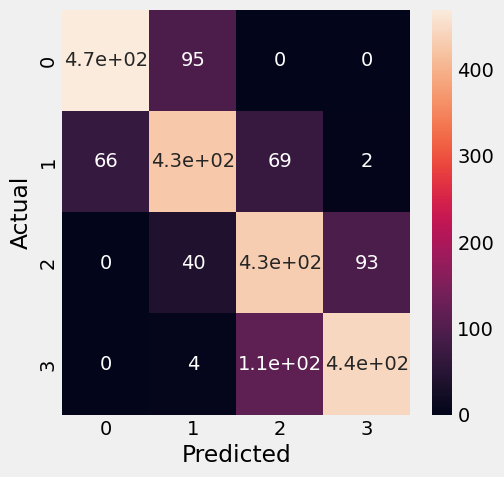

In [ ]:
param_grid={'C':[0.001,0.01,0.1,1,10,100], 'max_iter':[50,75,100,200,300,400,500,700]}
log=RandomizedSearchCV(LogisticRegression(solver='lbfgs'),param_grid,cv=5)
log.fit(X_train,y_train)
y_pred_log=log.predict(X_test)
confusion_log=confusion_matrix(y_test,log.predict(X_test))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_log,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_log))
print(log.best_params_)

##### 79% Accuracy

### 4. Random Forest Classifier

              precision    recall  f1-score   support

          -1       0.87      0.86      0.86       564
           0       0.81      0.77      0.79       563
           1       0.81      0.86      0.84       564
           2       0.90      0.90      0.90       563

    accuracy                           0.85      2254
   macro avg       0.85      0.85      0.85      2254
weighted avg       0.85      0.85      0.85      2254


Best Parameter: {'n_estimators': 50}



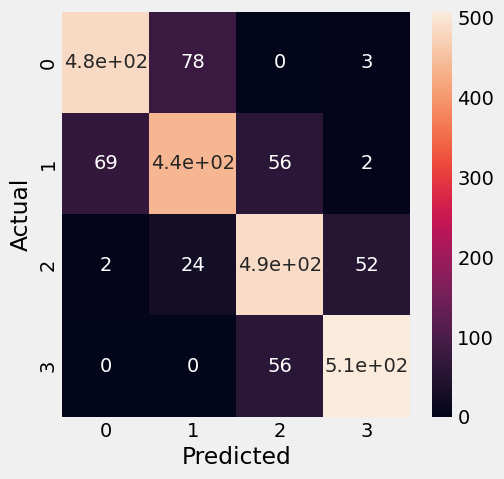

In [ ]:
param_grid = {
'n_estimators': [50, 75,100, 150, 200,300],
}
rcv=RandomizedSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=5)
rcv.fit(X_train,y_train)
y_pred_rcv=rcv.predict(X_test)
confusion_rcv=confusion_matrix(y_test,rcv.predict(X_test))
plt.figure(figsize=(5,5))
sns.heatmap(confusion_rcv,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_rcv))
print(f'\nBest Parameter: {rcv.best_params_}\n')

##### 85% Accuracy

### 5. Gradient Boosting

              precision    recall  f1-score   support

          -1       0.87      0.85      0.86       564
           0       0.80      0.79      0.79       563
           1       0.82      0.86      0.84       564
           2       0.90      0.90      0.90       563

    accuracy                           0.85      2254
   macro avg       0.85      0.85      0.85      2254
weighted avg       0.85      0.85      0.85      2254


Best Parameter: {'n_estimators': 300, 'learning_rate': 0.25}



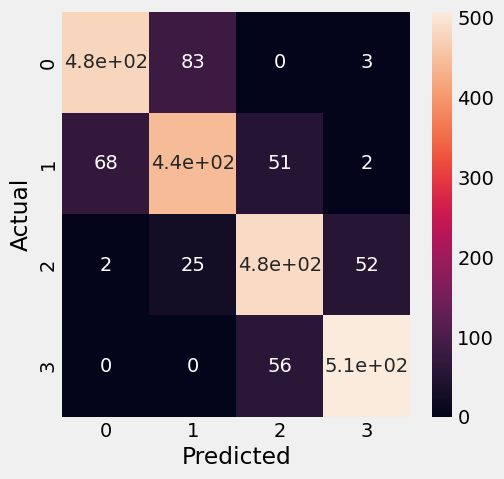

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {
    'learning_rate' : [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
    'n_estimators': [50, 75,100, 150, 200,300],
}

gbc=RandomizedSearchCV(GradientBoostingClassifier(random_state=42),param_grid,cv=5)
gbc.fit(X_train,y_train)
y_pred_gbc=gbc.predict(X_test)
confusion_gbc=confusion_matrix(y_test,y_pred_gbc)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_gbc,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_gbc))
print(f'\nBest Parameter: {gbc.best_params_}\n')

##### 85% Accuracy

### 6. ADABoost Classifier

              precision    recall  f1-score   support

          -1       0.73      0.87      0.80       564
           0       0.69      0.55      0.61       563
           1       0.57      0.68      0.62       564
           2       0.73      0.61      0.66       563

    accuracy                           0.68      2254
   macro avg       0.68      0.68      0.67      2254
weighted avg       0.68      0.68      0.67      2254



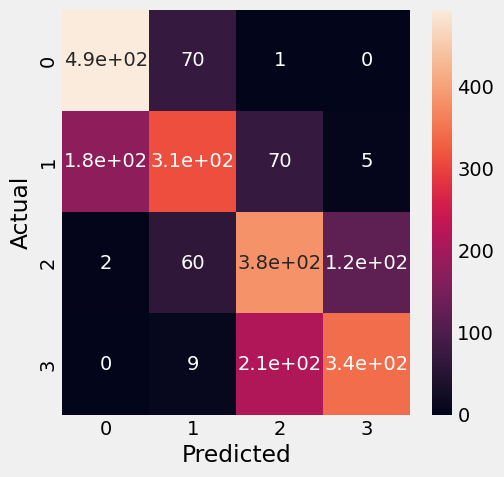

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clf_ada = AdaBoostClassifier(n_estimators=100)
clf_ada.fit(X_train,y_train)
y_pred_ada=clf_ada.predict(X_test)
confusion_ada=confusion_matrix(y_test,y_pred_ada)
plt.figure(figsize=(5,5))
sns.heatmap(confusion_ada,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
print(classification_report(y_test,y_pred_ada))

##### 68% Accuracy

### Training ensemble of these model

In [ ]:
from sklearn.ensemble import VotingClassifier

estimators=[('svc', SVC(gamma=10, C=10, probability=True)), ('rfc', RandomForestClassifier(n_estimators=50)), ('gbc', GradientBoostingClassifier(n_estimators=300, learning_rate=0.25)),
              ('log_reg', LogisticRegression(solver='lbfgs', max_iter=500, C=1)), ('knn', KNeighborsClassifier(n_neighbors=10)), ('ADA', AdaBoostClassifier(n_estimators=100))]

ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit_transform(X_train, y_train)
y_pred_ensemble = ensemble.predict(X_test)
print(classification_report(y_test,y_pred_ensemble))

              precision    recall  f1-score   support

          -1       0.87      0.87      0.87       564
           0       0.82      0.78      0.80       563
           1       0.82      0.86      0.84       564
           2       0.90      0.90      0.90       563

    accuracy                           0.85      2254
   macro avg       0.85      0.85      0.85      2254
weighted avg       0.85      0.85      0.85      2254



#### --> Using Ensemble Improves the Precision, Recall, f1-score

##### Saving the model

In [ ]:
import pickle
filepath = '/content/drive/MyDrive/Temp_hack/my_ensemble.pickle'
pickle.dump(ensemble, open(filepath, 'wb'))

NameError: ignored